In [1]:
import warnings
warnings.filterwarnings('ignore')
import dynamo as dyn

In [2]:
dyn.get_all_dependencies_version()

package,anndata,pre-commit,colorcet,cvxopt,dynamo-release,hdbscan,loompy,networkx,numba,numdifftools,numpy,pynndescent,python-igraph,seaborn,setuptools,statsmodels,tqdm,trimap,umap-learn,matplotlib,pandas,scikit-learn,scipy
version,0.7.6,2.12.1,2.0.6,1.2.6,0.96.0,0.8.27,3.0.6,2.4,0.51.2,0.9.39,1.20.1,0.5.2,0.8.2,0.10.1,47.3.1.post20200622,0.11.1,4.47.0,1.0.15,0.5.1,3.3.2,1.1.3,0.23.2,1.5.3


In [3]:
dyn.configuration.set_figure_params('dynamo', background='white')

In [4]:
adata = dyn.sample_data.DentateGyrus()

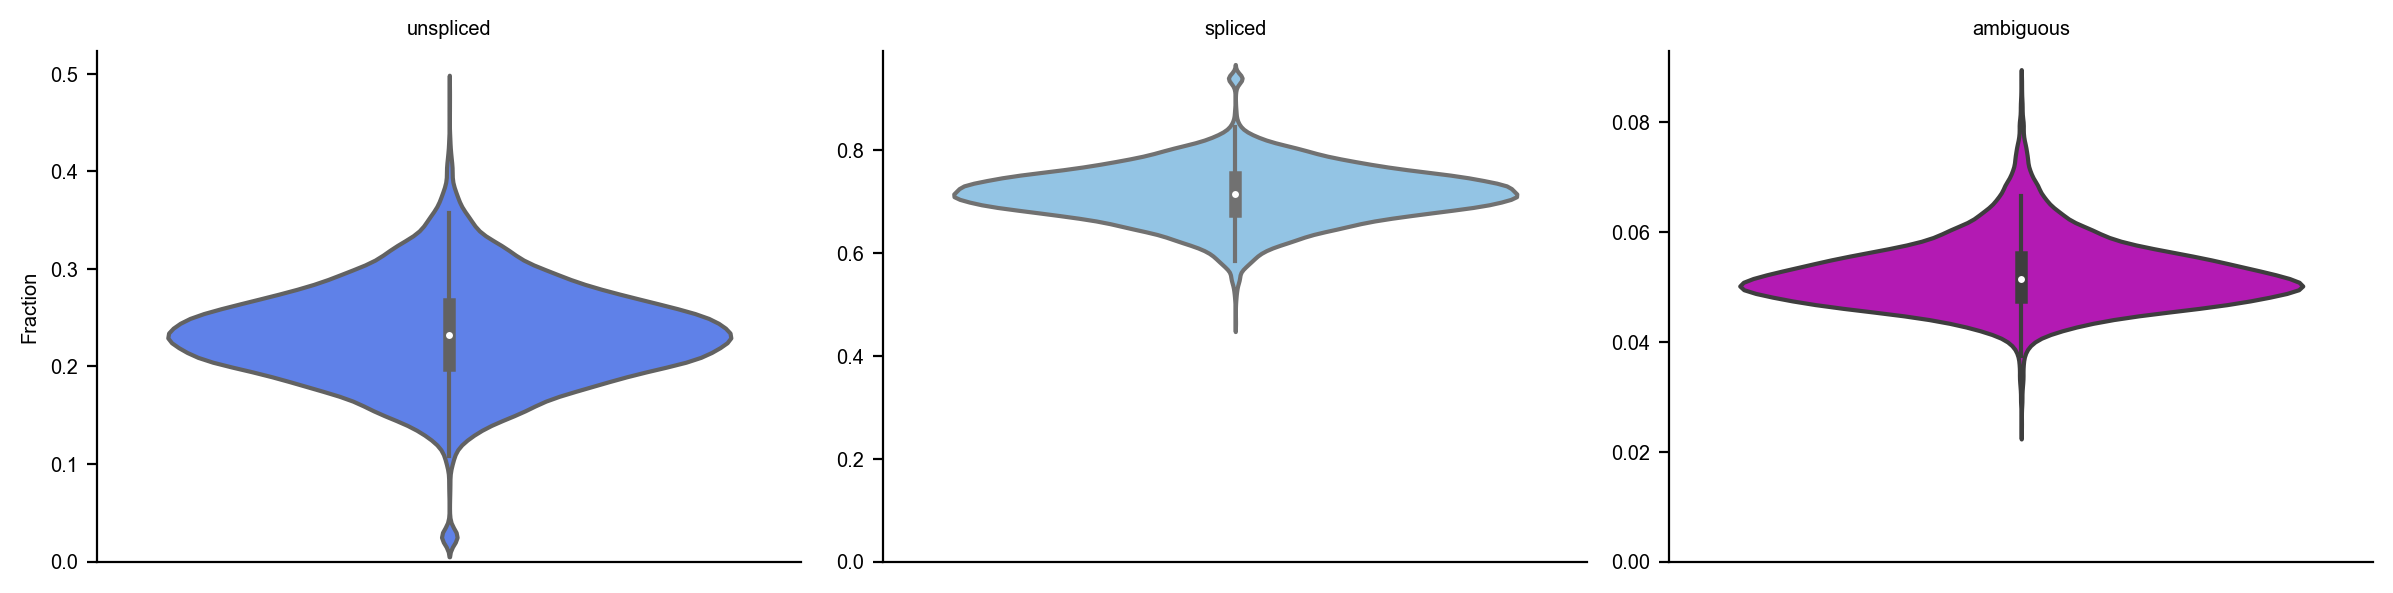

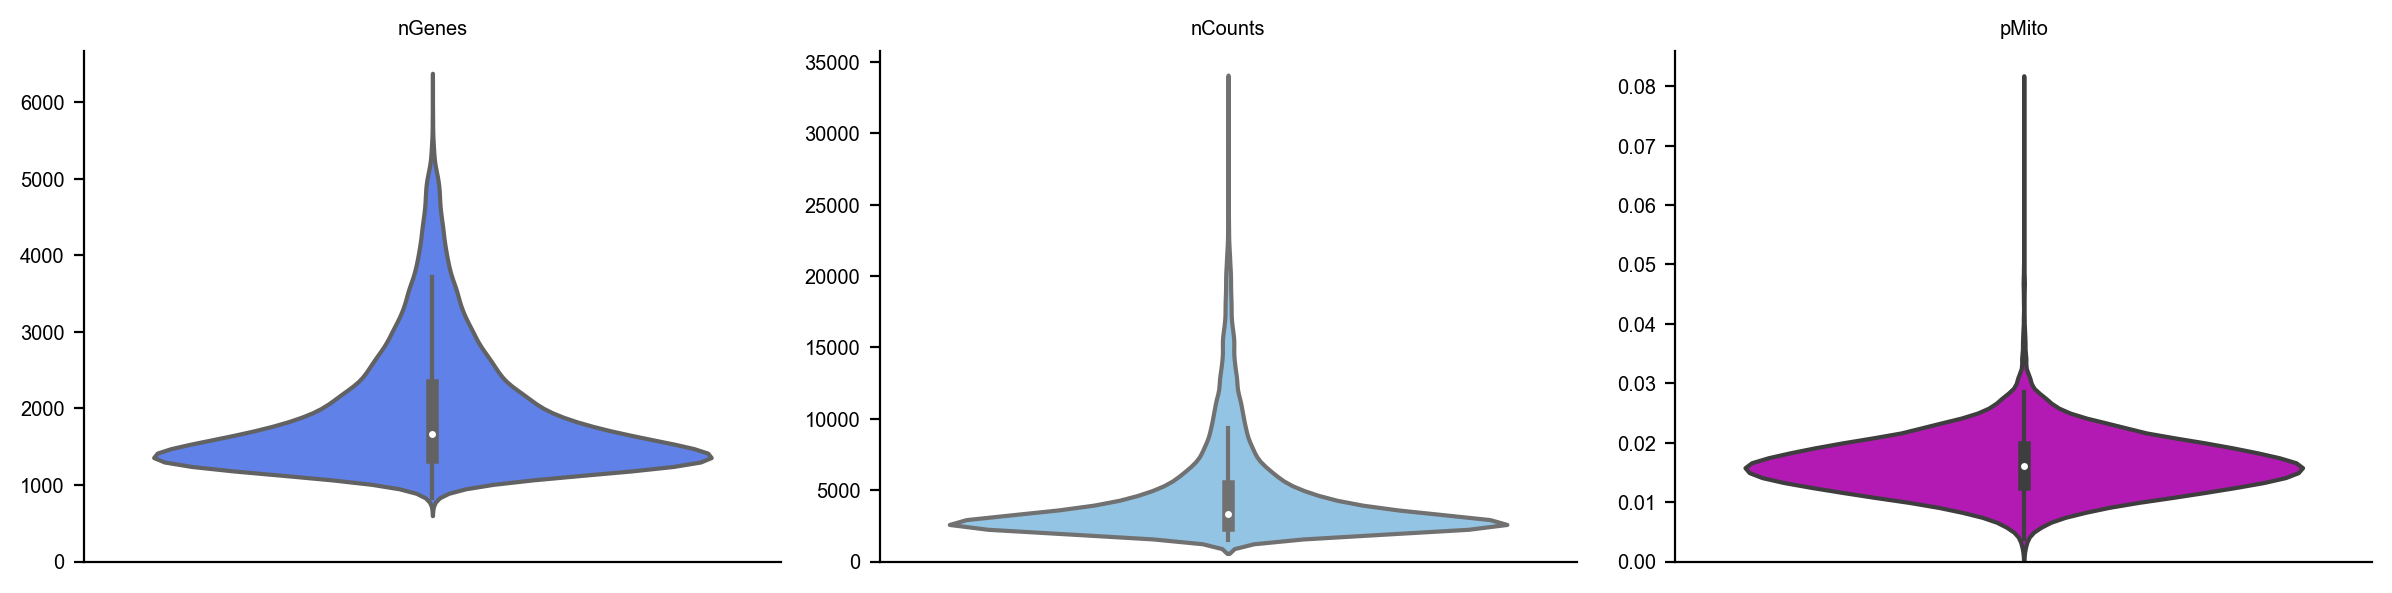

In [5]:
dyn.pl.show_fraction(adata)
dyn.pl.basic_stats(adata)

In [6]:
dyn.pp.recipe_monocle(adata, n_top_genes=2000, fg_kwargs={'shared_count': 30})

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> filtering genes...
|-----> calculating size factor...
|-----> selecting genes...
|-----> <insert> frac to var in AnnData Object.
|-----> size factor normalizing the data, followed by log1p transformation.
|-----> applying PCA ...
|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <inse

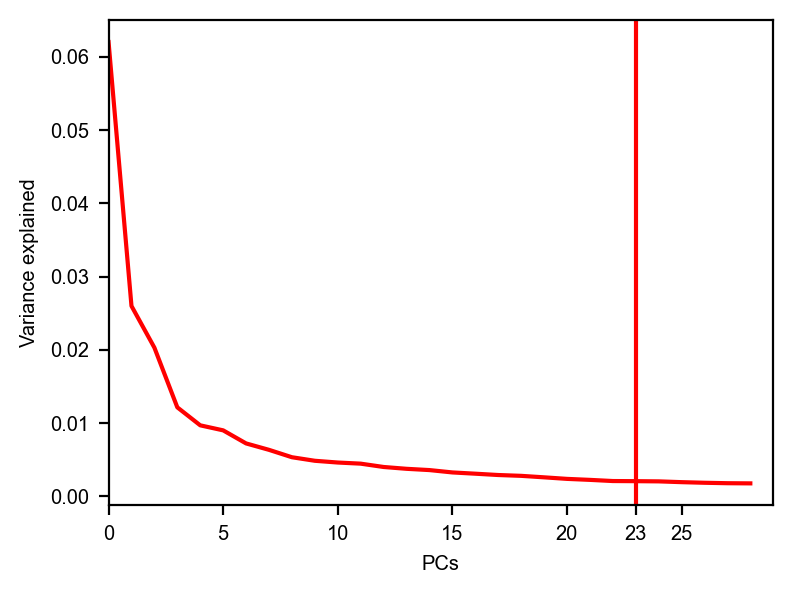

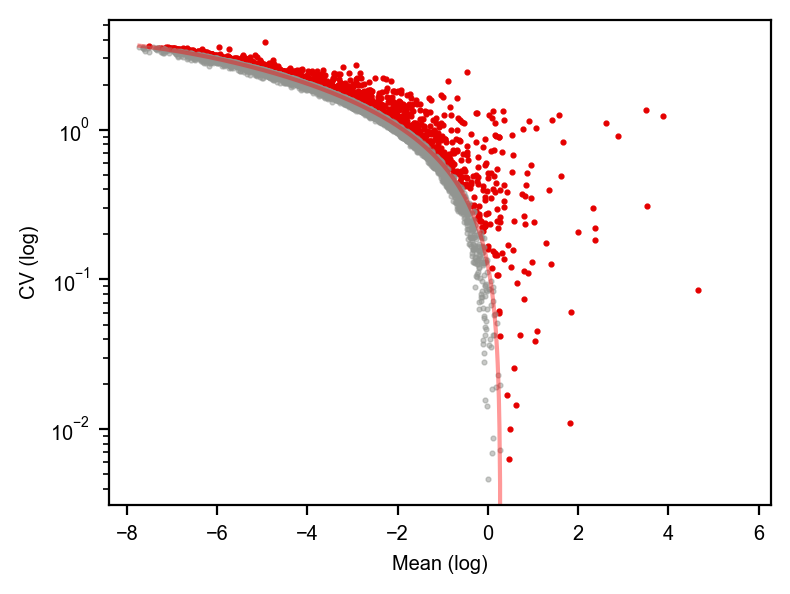

In [7]:
dyn.pl.variance_explained(adata)
dyn.pl.feature_genes(adata)

In [8]:
dyn.tl.dynamics(adata, model='stochastic', cores=1)

|-----> calculating first/second moments begins...
|
|-----> [moments calculation] finished [114.3678s]
estimating gamma: 100%|██████████| 2000/2000 [12:36<00:00,  2.64it/s]


AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 

In [9]:
dyn.tl.reduceDimension(adata, enforce=True)

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 

<Figure size 600x400 with 0 Axes>

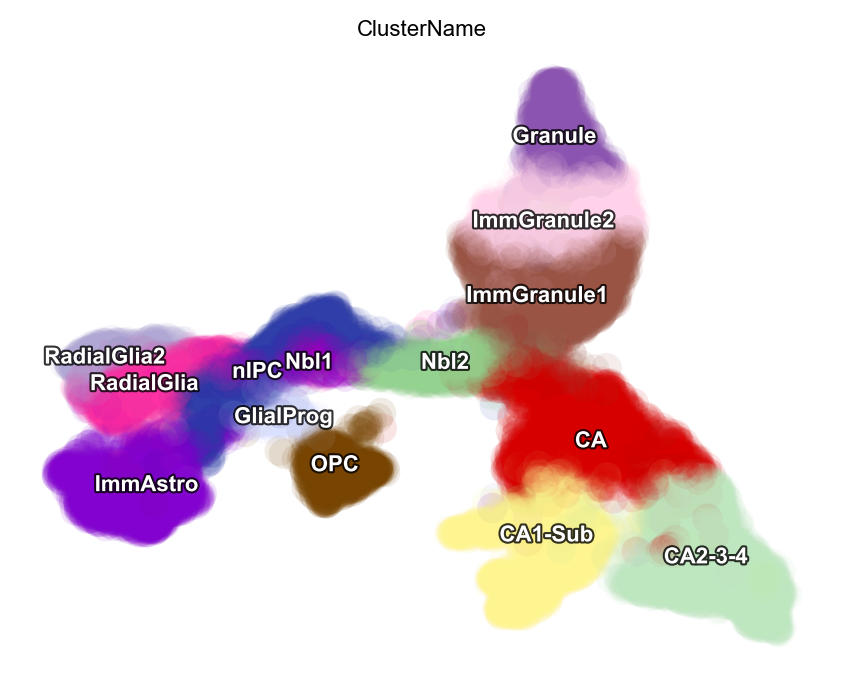

In [10]:
dyn.pl.umap(adata,color=['ClusterName'])

In [11]:
dyn.tl.cell_velocities(adata, basis='pca')

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 99.4729%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [357.4943s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 99.4729%
|-----> [projecting velocity vector to low dimensional embedding] finished [9.6483s]


AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 

In [12]:
dyn.vf.VectorField(adata, basis='pca')

|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> <insert> velocity_pca_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_pca_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_pca to uns in AnnData Object.
|-----> <insert> control_point_pca to obs in AnnData Object.
|-----> <insert> inlier_prob_pca to obs in AnnData Object.
|-----> <insert> obs_vf_angle_pca to obs in AnnData Object.
|
|-----> [VectorField] finished [7.4851s]


In [13]:
dyn.vf.speed(adata, basis='pca')
dyn.vf.divergence(adata, basis='pca')

Calculating divergence: 100%|██████████| 18213/18213 [00:16<00:00, 1133.56it/s]


|-----> [projecting velocity vector to low dimensional embedding] in progress: 3.0143%

Using existing pearson_transition_matrix found in .obsp.


|-----> [projecting velocity vector to low dimensional embedding] in progress: 99.4729%
|-----> [projecting velocity vector to low dimensional embedding] finished [6.7483s]


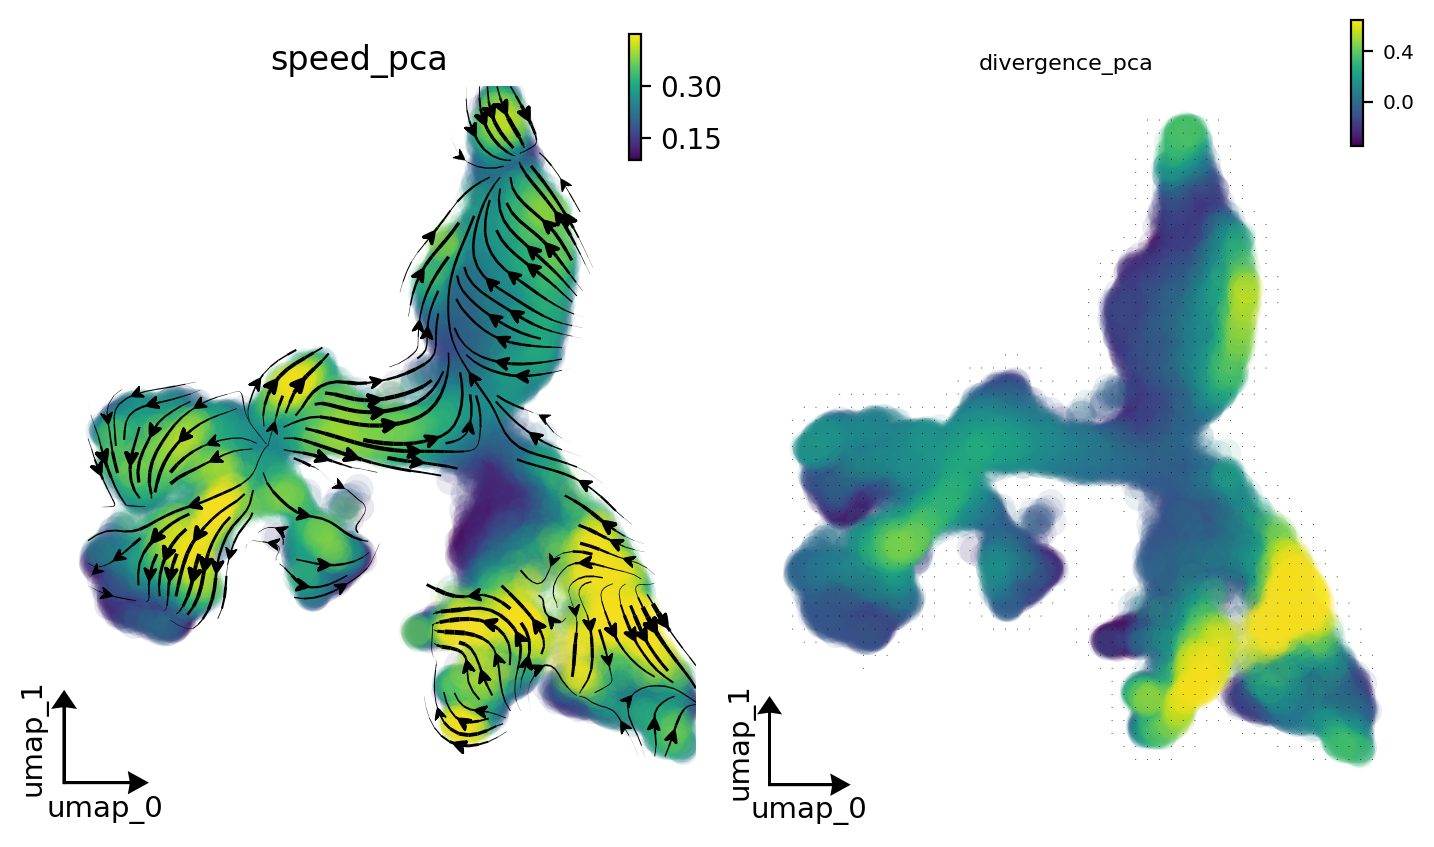

In [14]:
import matplotlib.pyplot as plt
fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(7,4))
f1_axes
f1_axes[1] = dyn.pl.grid_vectors(adata, color='divergence_pca', ax=f1_axes[1], quiver_length=0.01, quiver_size=0.0, save_show_or_return='both', theme='viridis')
f1_axes[0] = dyn.pl.streamline_plot(adata, color='speed_pca', ax=f1_axes[0], save_show_or_return='both')
plt.show()

In [15]:
import numpy as np
np.savetxt('Data/DentateGyrus/NormalizedCounts.csv', np.log1p(adata.layers['X_spliced'][:,adata.var['use_for_pca']]).todense(), delimiter=",")
np.savetxt('Data/DentateGyrus/TotCounts.csv', adata.obs['nCounts'], delimiter=",")
np.savetxt('Data/DentateGyrus/PCA_Genes.csv', adata.var.index[adata.var['use_for_pca']].tolist(), delimiter=",", fmt="%s")
np.savetxt('Data/DentateGyrus/PCA.csv', adata.obsm['X_pca'], delimiter=",")
np.savetxt('Data/DentateGyrus/UMap.csv', adata.obsm['X_umap'], delimiter=",")
np.savetxt('Data/DentateGyrus/PCA_Speed.csv', adata.obs['speed_pca'], delimiter=",")
np.savetxt('Data/DentateGyrus/PCA_Divergence.csv', adata.obs['divergence_pca'], delimiter=",")
with open("Data/DentateGyrus/CellType.csv", "w") as txt_file:
    for line in adata.obs['ClusterName']:
        txt_file.write("".join(line) + "\n")